# 3097S Milestone 1: Sonar chirp pulse simulation and processing #
# Part 2 - 40 kHz ultrasound transducer 

The bandwidth of the 40 kHz transducer was found to be 2 or 2.5 kHz depending if it was a transmitting or recieving transducer. For this report the bandwidth of 2 kHz was used. A value of 6 was used for k as the value 4 did not provide good results.

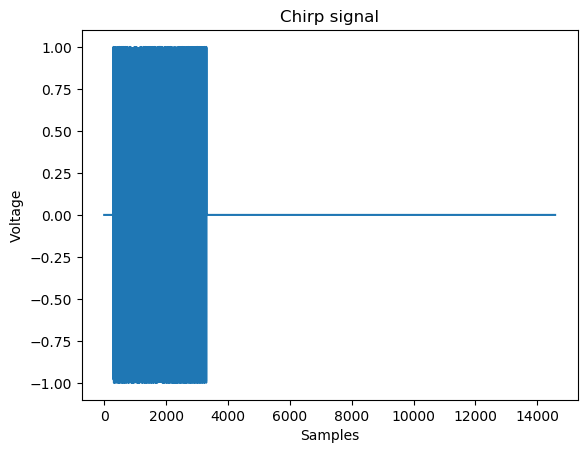

In [30]:
#STEP 1: Chirp pulse creation

c = 343;  # Speed of sound in air in m/s
B = 2000; # Chirp bandwidth
k = 125;
fs = k*B; # This is the sample rate of the sonar.
dt = 1/fs; # This is the sample spacing
r_max = 10; # Maximum range in metres to which to simulate.
t_max = 2*r_max/c; # Time delay to max range

# Create an array containing the time values of the samples
t = collect(0:dt:t_max); # t=0:dt:t_max defines a “range”.
# Create an array containing the range values of the samples
r = c*t/2;
# NOW create the chirp pulse, shifted by an amount td, to start at
# some time td-T/2>0.
f0 = 40000; # Centre frequency is 40 kHz
T = 12E-3; # Chirp pulse length
K = B/T; # Chirp rate
# Define a simple a rect() function which returns for -0.5<=t<=0.5 or 0.
# The function will work if t is an array of values.
rect(t) = (abs.(t) .<= 0.5)*1.0
# rect(t/T) spans the interval [-T/2,T/2]
# We must therefore delay the chirp pulse so that it starts after t=0.
# Shift the chirp pulse by 0.6T units to the right, so that it starts at
0.1*T
td = 0.6*T; # Chirp delay
# Note: one can use the macro “@.” to avoid having to put “.” for arrays:
# @. v_tx = cos( 2*pi*(f0*(t-td) + 0.5*K*(t-td).^2) ).*rect((t-td)/T);
v_tx = cos.( 2*pi*(f0*(t .- td) + 0.5*K*(t .- td).^2) ) .* rect.((t .-td)/T);


using PyPlot; pygui(false) # import plot library
# If not installed, add the package via: using Pkg; Pkg.add("PyPlot");
figure() # Create a new figure
plot(v_tx) # Basic plot, axis labeled in samples
title("Chirp signal")
xlabel("Samples");
ylabel("Voltage");


In [31]:
using FFTW # If not installed do: using Pkg; Pkg.add("FFTW");

V_TX = fft(v_tx); 

 Resolving package versions...
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Project.toml`
 [no changes]
  Updating `C:\Users\MikeR\.julia\environments\v1.1\Manifest.toml`
 [no changes]


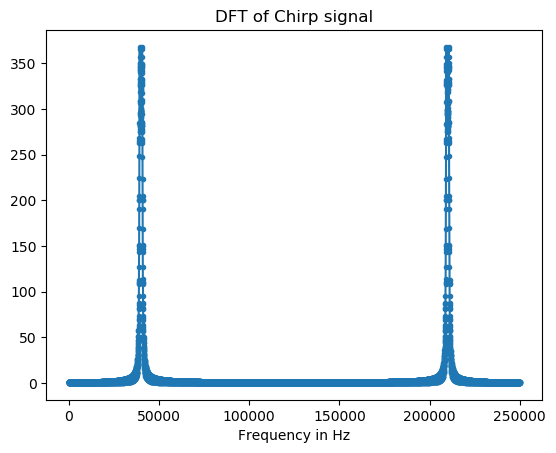

In [32]:
#LABEL frequency axis
N = length(t);
Δf = 1/(N*dt) # spacing in frequency domain
#create array of freq values stored in f_axis. First element maps to 0Hz
f_axis = (0:N-1)*Δf;
figure();
plot(f_axis, abs.(V_TX),".-");
title("DFT of Chirp signal");
xlabel("Frequency in Hz");

In [1]:
R1 was chosen to be the same as part 1. R2 was chosen to be 5m away.

LoadError: syntax: extra token "was" after end of expression

In [9]:
using  DelimitedFiles
v_rx = readdlm("Waveform.txt", ',')
print(numbers[3])

-0.008059

In [10]:
#STEP 2: Point target simulation

R1 = 1.5 + (12-2)/12 # 2.33m - range to target.
td1 = 2*R1/c; # two way delay to target.
A1 = 1/R1^2; # echo voltage signal proportional to 1/R^2
#v_rx = A1*cos.( 2*pi*(f0*(t.-td.-td1) + 0.5*K*(t.-td.-td1).^2) ) .* rect((t.-
td.-td1)/T); 

V_RX = fft(v_rx);

UndefVarError: UndefVarError: c not defined

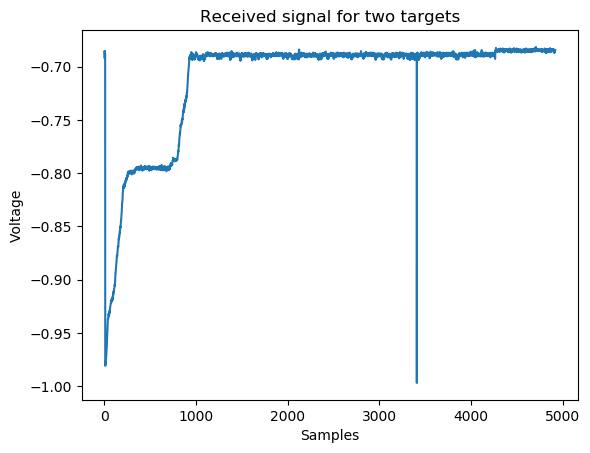

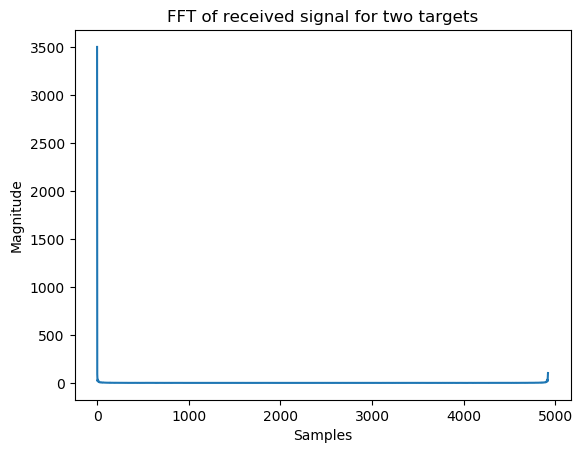

In [46]:
#second target
R2 = 5  # 5m - range to target.
td2 = 2*R2/c; # two way delay to target.
A2 = 1/R2^2; # echo voltage signal proportional to 1/R^2
v_rx = [-0.685958, -0.687912, -0.690354, -0.691331, -0.692308, -0.691331, -0.689377, -0.68547, -0.686935, -0.689377, -0.980952, -0.979487, -0.979976, -0.978022, -0.979487, -0.978999, -0.977534, -0.976068, -0.975092, -0.973626, -0.97265, -0.971184, -0.970208, -0.969231, -0.967277, -0.96337, -0.962882, -0.962393, -0.96044, -0.958486, -0.955556, -0.953114, -0.950672, -0.949206, -0.946764, -0.944811, -0.942369, -0.941392, -0.937973, -0.936996, -0.936996, -0.936996, -0.936996, -0.93602, -0.935043, -0.934066, -0.932112, -0.932601, -0.932601, -0.933089, -0.932601, -0.934554, -0.934066, -0.933089, -0.931624, -0.931136, -0.930159, -0.929182, -0.929182, -0.929182, -0.931136, -0.927717, -0.927717, -0.926252, -0.925763, -0.925275, -0.925275, -0.924298, -0.92381, -0.92381, -0.922833, -0.922344, -0.919902, -0.920391, -0.919902, -0.919414, -0.919902, -0.921368, -0.920879, -0.919902, -0.919902, -0.919414, -0.918437, -0.91746, -0.917949, -0.91746, -0.917949, -0.91746, -0.916972, -0.919414, -0.91746, -0.917949, -0.915995, -0.915018, -0.915018, -0.915507, -0.91453, -0.913553, -0.914042, -0.912088, -0.911111, -0.911111, -0.912088, -0.912088, -0.911111, -0.911111, -0.910134, -0.908181, -0.908181, -0.907692, -0.907204, -0.905739, -0.905739, -0.904762, -0.90525, -0.905739, -0.903785, -0.900855, -0.898413, -0.897924, -0.896947, -0.894994, -0.893529, -0.893529, -0.89304, -0.891087, -0.889133, -0.888645, -0.887668, -0.886203, -0.884737, -0.884249, -0.883761, -0.882295, -0.881319, -0.88083, -0.878388, -0.877411, -0.876923, -0.8779, -0.878388, -0.877411, -0.875946, -0.875458, -0.873993, -0.872527, -0.871551, -0.870574, -0.869109, -0.869597, -0.869109, -0.869109, -0.869597, -0.86862, -0.866667, -0.864225, -0.864713, -0.862271, -0.861294, -0.862271, -0.860806, -0.860317, -0.860806, -0.858364, -0.857875, -0.857875, -0.857875, -0.856899, -0.855922, -0.854945, -0.855922, -0.852503, -0.852991, -0.852503, -0.852015, -0.850061, -0.851038, -0.849573, -0.849573, -0.848596, -0.847619, -0.846154, -0.844689, -0.843712, -0.842247, -0.842247, -0.84127, -0.839805, -0.837851, -0.837363, -0.836386, -0.833455, -0.830037, -0.830037, -0.82906, -0.828571, -0.826618, -0.826618, -0.825153, -0.824176, -0.820757, -0.81978, -0.818803, -0.817827, -0.815873, -0.813431, -0.813919, -0.813431, -0.813919, -0.812943, -0.812454, -0.812454, -0.811477, -0.810501, -0.813431, -0.813919, -0.813431, -0.812943, -0.810989, -0.811966, -0.810989, -0.810989, -0.812454, -0.811966, -0.811477, -0.809035, -0.810012, -0.810012, -0.810012, -0.809035, -0.808059, -0.807082, -0.807082, -0.808059, -0.808059, -0.806593, -0.805617, -0.806105, -0.80464, -0.805617, -0.806593, -0.806593, -0.806105, -0.806105, -0.806105, -0.805128, -0.803175, -0.803663, -0.803175, -0.803663, -0.802198, -0.802198, -0.803175, -0.803663, -0.801709, -0.801221, -0.799756, -0.799267, -0.799756, -0.799756, -0.799267, -0.798779, -0.800733, -0.799267, -0.800244, -0.799267, -0.798779, -0.798779, -0.800244, -0.799267, -0.799267, -0.799756, -0.799756, -0.798291, -0.798291, -0.798779, -0.798779, -0.799267, -0.800244, -0.798779, -0.798779, -0.800244, -0.799267, -0.798779, -0.799756, -0.799267, -0.799267, -0.800244, -0.799756, -0.798291, -0.797802, -0.798291, -0.797802, -0.798291, -0.798779, -0.798779, -0.799756, -0.799267, -0.798291, -0.798779, -0.799267, -0.801221, -0.800244, -0.799267, -0.798779, -0.798779, -0.800244, -0.798779, -0.798779, -0.800244, -0.799267, -0.797802, -0.799267, -0.799267, -0.800244, -0.799756, -0.798779, -0.799267, -0.799756, -0.799267, -0.798291, -0.798779, -0.800244, -0.798291, -0.798291, -0.797314, -0.798291, -0.798779, -0.800244, -0.797802, -0.797802, -0.798291, -0.797314, -0.797802, -0.797314, -0.797802, -0.797314, -0.796825, -0.796337, -0.796825, -0.797314, -0.797314, -0.795849, -0.79536, -0.79536, -0.796337, -0.79536, -0.795849, -0.794872, -0.79536, -0.794872, -0.796337, -0.796825, -0.796337, -0.794872, -0.795849, -0.795849, -0.79536, -0.794872, -0.796337, -0.794872, -0.79536, -0.79536, -0.795849, -0.796337, -0.795849, -0.795849, -0.794872, -0.794872, -0.796337, -0.794872, -0.79536, -0.795849, -0.795849, -0.794383, -0.793895, -0.79536, -0.796825, -0.797314, -0.795849, -0.794872, -0.79536, -0.79536, -0.796825, -0.795849, -0.795849, -0.794383, -0.79536, -0.79536, -0.796825, -0.796337, -0.795849, -0.794383, -0.794383, -0.794872, -0.795849, -0.79536, -0.796337, -0.793895, -0.794383, -0.792918, -0.794872, -0.795849, -0.796337, -0.794383, -0.793895, -0.794872, -0.79536, -0.79536, -0.795849, -0.79536, -0.79536, -0.795849, -0.794872, -0.796825, -0.797314, -0.797802, -0.796337, -0.794872, -0.795849, -0.79536, -0.796337, -0.795849, -0.794383, -0.794872, -0.794872, -0.796337, -0.796337, -0.794872, -0.794383, -0.794872, -0.796337, -0.794872, -0.795849, -0.79536, -0.796825, -0.794872, -0.795849, -0.793895, -0.796337, -0.796337, -0.79536, -0.79536, -0.793407, -0.79536, -0.79536, -0.79536, -0.795849, -0.794872, -0.795849, -0.794383, -0.795849, -0.795849, -0.79536, -0.79536, -0.795849, -0.794872, -0.796337, -0.794383, -0.794872, -0.795849, -0.794872, -0.796337, -0.793895, -0.795849, -0.795849, -0.794872, -0.794872, -0.795849, -0.795849, -0.79536, -0.795849, -0.794383, -0.794872, -0.795849, -0.793895, -0.79536, -0.795849, -0.796337, -0.794872, -0.79536, -0.795849, -0.79536, -0.794872, -0.796337, -0.795849, -0.794383, -0.793407, -0.794872, -0.79536, -0.797802, -0.797314, -0.795849, -0.794383, -0.794872, -0.794872, -0.796337, -0.796337, -0.793895, -0.79536, -0.79536, -0.795849, -0.79536, -0.796337, -0.79536, -0.794383, -0.794872, -0.795849, -0.79536, -0.795849, -0.79536, -0.79536, -0.79536, -0.794872, -0.797314, -0.797314, -0.796337, -0.794872, -0.79536, -0.795849, -0.795849, -0.79536, -0.79536, -0.795849, -0.795849, -0.793895, -0.795849, -0.795849, -0.795849, -0.794872, -0.79536, -0.794872, -0.79536, -0.795849, -0.795849, -0.794872, -0.79536, -0.795849, -0.79536, -0.796337, -0.796337, -0.79536, -0.793895, -0.79536, -0.795849, -0.794872, -0.795849, -0.795849, -0.79536, -0.79536, -0.794872, -0.796337, -0.795849, -0.795849, -0.794383, -0.794872, -0.79536, -0.795849, -0.79536, -0.794872, -0.795849, -0.79536, -0.795849, -0.794383, -0.795849, -0.795849, -0.79536, -0.79536, -0.796825, -0.79536, -0.79536, -0.795849, -0.79536, -0.795849, -0.794872, -0.794383, -0.796337, -0.795849, -0.79536, -0.794872, -0.795849, -0.79536, -0.79536, -0.796337, -0.794872, -0.795849, -0.794872, -0.795849, -0.794383, -0.795849, -0.795849, -0.794872, -0.79536, -0.796825, -0.795849, -0.79536, -0.795849, -0.794872, -0.79536, -0.796337, -0.793407, -0.794383, -0.79536, -0.796337, -0.79536, -0.79536, -0.795849, -0.794383, -0.793407, -0.793895, -0.793895, -0.794383, -0.794872, -0.794872, -0.796825, -0.797314, -0.795849, -0.794383, -0.794383, -0.794872, -0.795849, -0.79536, -0.797314, -0.795849, -0.794383, -0.79243, -0.792918, -0.794383, -0.794383, -0.794383, -0.793895, -0.793895, -0.794383, -0.794872, -0.794872, -0.794872, -0.79536, -0.796337, -0.794872, -0.796825, -0.797314, -0.796825, -0.796337, -0.79536, -0.79536, -0.79536, -0.795849, -0.795849, -0.795849, -0.794872, -0.794383, -0.79536, -0.797314, -0.796337, -0.794383, -0.793407, -0.793407, -0.793895, -0.794872, -0.794872, -0.795849, -0.79536, -0.79536, -0.793895, -0.795849, -0.795849, -0.79536, -0.79536, -0.796337, -0.79536, -0.794872, -0.795849, -0.795849, -0.794872, -0.79536, -0.794872, -0.797802, -0.798291, -0.798291, -0.796337, -0.79536, -0.79536, -0.796337, -0.79536, -0.796337, -0.79536, -0.796337, -0.79536, -0.794383, -0.795849, -0.795849, -0.794383, -0.793895, -0.79536, -0.794383, -0.79536, -0.795849, -0.79536, -0.79536, -0.794383, -0.793895, -0.794872, -0.797314, -0.797314, -0.79536, -0.795849, -0.79536, -0.79536, -0.795849, -0.795849, -0.794872, -0.795849, -0.79536, -0.794383, -0.795849, -0.796337, -0.794383, -0.793407, -0.793407, -0.793407, -0.792918, -0.793407, -0.792918, -0.79243, -0.791453, -0.790965, -0.79243, -0.792918, -0.791453, -0.790965, -0.792918, -0.793407, -0.791453, -0.791941, -0.790965, -0.791941, -0.791453, -0.791453, -0.791453, -0.79243, -0.791941, -0.790476, -0.790476, -0.789988, -0.789499, -0.789499, -0.789011, -0.788034, -0.788523, -0.787546, -0.785592, -0.786569, -0.787057, -0.787546, -0.787546, -0.787057, -0.787057, -0.788034, -0.787546, -0.787546, -0.787546, -0.788034, -0.786569, -0.786569, -0.787546, -0.787546, -0.787546, -0.787546, -0.787546, -0.787057, -0.789011, -0.787057, -0.787546, -0.788523, -0.787057, -0.787546, -0.788523, -0.787057, -0.787546, -0.788523, -0.787546, -0.787057, -0.787546, -0.788034, -0.787057, -0.787057, -0.788034, -0.787057, -0.788034, -0.787546, -0.787546, -0.788034, -0.787546, -0.786569, -0.786569, -0.787546, -0.786569, -0.785592, -0.785592, -0.784615, -0.784127, -0.784127, -0.783639, -0.78315, -0.782662, -0.781685, -0.779731, -0.779243, -0.779731, -0.778755, -0.777778, -0.776313, -0.774847, -0.773382, -0.774359, -0.773871, -0.771917, -0.769963, -0.768498, -0.767033, -0.766545, -0.766056, -0.764591, -0.763614, -0.763614, -0.762149, -0.763126, -0.762149, -0.761661, -0.760195, -0.759219, -0.758242, -0.756777, -0.754823, -0.756288, -0.754823, -0.754335, -0.754335, -0.753846, -0.754823, -0.754823, -0.754823, -0.753846, -0.752869, -0.752381, -0.751893, -0.750427, -0.750427, -0.752381, -0.750916, -0.748962, -0.749451, -0.749939, -0.749451, -0.748962, -0.747985, -0.746032, -0.745055, -0.744567, -0.744078, -0.742613, -0.742613, -0.743101, -0.741148, -0.742613, -0.742125, -0.741148, -0.739194, -0.738706, -0.739683, -0.738706, -0.739194, -0.739683, -0.739683, -0.737241, -0.734799, -0.737241, -0.736752, -0.737241, -0.735775, -0.73431, -0.732845, -0.733822, -0.733822, -0.733333, -0.733333, -0.731868, -0.730891, -0.731868, -0.730891, -0.732357, -0.730403, -0.729915, -0.728938, -0.729915, -0.728449, -0.727473, -0.727961, -0.727473, -0.726496, -0.724542, -0.725031, -0.725031, -0.724542, -0.722589, -0.720147, -0.718193, -0.718193, -0.717705, -0.715751, -0.714774, -0.712821, -0.710867, -0.708425, -0.708425, -0.706471, -0.705495, -0.704029, -0.703541, -0.702564, -0.701587, -0.700122, -0.699145, -0.698168, -0.697192, -0.693773, -0.693284, -0.692796, -0.690842, -0.690842, -0.690842, -0.691819, -0.691819, -0.693284, -0.690842, -0.690354, -0.690354, -0.691331, -0.690354, -0.691331, -0.692796, -0.688889, -0.689377, -0.6884, -0.6884, -0.689377, -0.689377, -0.6884, -0.688889, -0.6884, -0.686447, -0.687912, -0.690842, -0.690842, -0.690842, -0.691331, -0.691819, -0.691819, -0.693773, -0.690842, -0.690354, -0.690842, -0.692308, -0.691331, -0.693284, -0.692308, -0.692308, -0.692796, -0.690842, -0.689377, -0.688889, -0.689866, -0.6884, -0.690842, -0.690842, -0.689377, -0.690842, -0.692308, -0.691331, -0.691331, -0.691819, -0.691819, -0.693284, -0.691331, -0.689866, -0.691331, -0.692308, -0.691331, -0.690354, -0.693284, -0.689866, -0.690354, -0.690842, -0.689866, -0.689866, -0.690354, -0.689866, -0.689377, -0.689377, -0.687424, -0.686447, -0.689377, -0.688889, -0.6884, -0.688889, -0.687912, -0.6884, -0.688889, -0.688889, -0.687424, -0.6884, -0.689377, -0.6884, -0.6884, -0.689866, -0.690842, -0.690842, -0.690842, -0.690842, -0.690842, -0.691819, -0.692796, -0.691331, -0.690842, -0.690842, -0.691331, -0.692308, -0.693773, -0.691331, -0.691819, -0.691819, -0.693284, -0.691819, -0.690842, -0.691819, -0.692796, -0.690354, -0.690842, -0.690842, -0.692308, -0.694261, -0.692308, -0.691819, -0.691819, -0.692796, -0.690354, -0.689866, -0.690354, -0.691331, -0.690842, -0.691819, -0.692796, -0.691819, -0.692308, -0.691819, -0.692796, -0.690842, -0.690842, -0.691819, -0.692796, -0.691331, -0.691331, -0.691331, -0.690354, -0.691819, -0.693284, -0.690842, -0.689866, -0.689866, -0.690842, -0.690354, -0.690354, -0.690354, -0.689377, -0.688889, -0.6884, -0.689866, -0.691819, -0.692308, -0.691331, -0.690842, -0.691331, -0.688889, -0.690842, -0.691331, -0.691331, -0.691819, -0.69475, -0.691819, -0.694261, -0.692308, -0.691819, -0.692796, -0.690842, -0.690842, -0.691331, -0.692308, -0.691331, -0.692308, -0.692796, -0.689377, -0.689377, -0.690354, -0.690354, -0.689377, -0.689377, -0.6884, -0.688889, -0.687912, -0.688889, -0.687424, -0.6884, -0.6884, -0.689377, -0.690354, -0.690354, -0.689866, -0.688889, -0.6884, -0.6884, -0.689866, -0.689377, -0.688889, -0.688889, -0.688889, -0.686447, -0.6884, -0.689377, -0.687912, -0.6884, -0.689866, -0.689377, -0.6884, -0.688889, -0.688889, -0.688889, -0.687424, -0.687424, -0.686935, -0.689377, -0.689377, -0.6884, -0.6884, -0.6884, -0.689377, -0.688889, -0.687424, -0.687912, -0.688889, -0.6884, -0.689377, -0.6884, -0.690354, -0.689866, -0.689377, -0.688889, -0.687912, -0.688889, -0.6884, -0.689377, -0.6884, -0.688889, -0.688889, -0.687424, -0.689377, -0.688889, -0.6884, -0.687912, -0.689377, -0.6884, -0.689377, -0.6884, -0.6884, -0.689377, -0.6884, -0.6884, -0.689377, -0.689866, -0.689866, -0.689866, -0.689866, -0.688889, -0.6884, -0.690354, -0.689377, -0.6884, -0.688889, -0.6884, -0.688889, -0.689866, -0.690354, -0.689377, -0.6884, -0.688889, -0.6884, -0.688889, -0.688889, -0.6884, -0.689377, -0.6884, -0.687912, -0.689377, -0.689866, -0.689377, -0.687912, -0.689377, -0.6884, -0.688889, -0.688889, -0.6884, -0.688889, -0.688889, -0.688889, -0.687424, -0.689377, -0.688889, -0.687912, -0.6884, -0.689377, -0.687912, -0.6884, -0.689377, -0.688889, -0.6884, -0.688889, -0.687912, -0.689866, -0.690842, -0.691819, -0.691819, -0.691819, -0.692308, -0.692796, -0.690842, -0.691331, -0.691331, -0.692796, -0.690842, -0.689866, -0.691819, -0.692796, -0.689866, -0.689866, -0.689866, -0.689866, -0.690354, -0.690354, -0.689377, -0.689377, -0.687912, -0.6884, -0.689866, -0.691819, -0.691819, -0.692796, -0.690354, -0.688889, -0.688889, -0.688889, -0.687912, -0.688889, -0.689866, -0.689866, -0.688889, -0.691819, -0.690842, -0.690842, -0.691331, -0.689866, -0.690354, -0.690354, -0.690354, -0.689866, -0.690842, -0.690842, -0.690842, -0.692796, -0.689866, -0.689377, -0.689377, -0.688889, -0.687912, -0.689377, -0.689377, -0.687424, -0.6884, -0.689377, -0.688889, -0.687912, -0.6884, -0.688889, -0.689866, -0.688889, -0.6884, -0.6884, -0.689377, -0.6884, -0.689866, -0.689377, -0.688889, -0.687912, -0.690354, -0.690842, -0.689866, -0.689377, -0.6884, -0.6884, -0.688889, -0.689377, -0.688889, -0.6884, -0.689866, -0.689377, -0.6884, -0.689866, -0.690354, -0.689377, -0.688889, -0.687424, -0.687424, -0.6884, -0.688889, -0.688889, -0.6884, -0.687912, -0.688889, -0.689866, -0.689377, -0.689377, -0.688889, -0.687424, -0.687424, -0.687912, -0.688889, -0.689377, -0.6884, -0.6884, -0.688889, -0.6884, -0.690354, -0.688889, -0.689377, -0.686935, -0.686935, -0.6884, -0.689377, -0.6884, -0.689866, -0.689866, -0.689377, -0.687912, -0.689377, -0.688889, -0.688889, -0.687912, -0.688889, -0.688889, -0.687912, -0.689866, -0.689866, -0.689866, -0.689377, -0.689377, -0.686935, -0.687912, -0.690842, -0.690842, -0.690842, -0.690842, -0.691331, -0.690842, -0.691819, -0.692308, -0.693773, -0.691819, -0.692308, -0.693284, -0.692308, -0.691819, -0.692796, -0.690842, -0.690842, -0.690842, -0.692796, -0.690354, -0.689377, -0.689377, -0.6884, -0.68547, -0.689377, -0.688889, -0.687424, -0.6884, -0.687912, -0.6884, -0.689866, -0.689377, -0.687424, -0.689377, -0.687424, -0.686935, -0.689866, -0.690842, -0.690354, -0.690354, -0.689377, -0.687912, -0.688889, -0.688889, -0.6884, -0.689377, -0.688889, -0.687912, -0.6884, -0.690842, -0.690842, -0.690842, -0.690354, -0.690354, -0.690354, -0.690354, -0.689377, -0.689377, -0.688889, -0.6884, -0.687912, -0.689377, -0.689377, -0.689377, -0.687912, -0.6884, -0.6884, -0.689377, -0.6884, -0.689377, -0.6884, -0.6884, -0.688889, -0.689377, -0.689866, -0.690354, -0.690354, -0.6884, -0.6884, -0.689866, -0.689377, -0.686935, -0.6884, -0.689866, -0.689866, -0.689377, -0.689866, -0.690354, -0.689866, -0.689377, -0.6884, -0.688889, -0.688889, -0.688889, -0.687912, -0.689377, -0.687912, -0.6884, -0.688889, -0.689866, -0.690354, -0.689377, -0.6884, -0.688889, -0.688889, -0.688889, -0.687912, -0.687912, -0.690354, -0.689377, -0.687912, -0.689866, -0.690842, -0.691819, -0.692308, -0.691819, -0.691819, -0.692308, -0.694261, -0.691331, -0.691819, -0.692308, -0.694261, -0.691331, -0.693284, -0.690354, -0.689866, -0.688889, -0.688889, -0.688889, -0.688889, -0.687912, -0.689377, -0.689377, -0.6884, -0.687424, -0.687912, -0.690354, -0.690354, -0.689377, -0.688889, -0.687424, -0.687912, -0.689377, -0.6884, -0.6884, -0.689377, -0.6884, -0.6884, -0.690354, -0.690842, -0.690354, -0.690354, -0.689377, -0.6884, -0.6884, -0.689377, -0.688889, -0.6884, -0.689377, -0.687912, -0.689377, -0.690354, -0.689377, -0.687912, -0.688889, -0.687424, -0.687912, -0.690354, -0.689866, -0.689377, -0.687912, -0.689377, -0.687912, -0.690354, -0.689866, -0.689866, -0.689866, -0.689866, -0.689866, -0.689377, -0.689377, -0.6884, -0.688889, -0.688889, -0.687424, -0.6884, -0.690354, -0.689866, -0.688889, -0.6884, -0.6884, -0.688889, -0.689377, -0.688889, -0.6884, -0.689377, -0.6884, -0.687912, -0.690354, -0.690842, -0.690354, -0.689377, -0.689377, -0.687424, -0.6884, -0.689377, -0.6884, -0.689377, -0.6884, -0.686935, -0.688889, -0.689866, -0.689377, -0.6884, -0.6884, -0.688889, -0.688889, -0.688889, -0.687912, -0.6884, -0.690354, -0.689377, -0.6884, -0.689866, -0.690354, -0.689866, -0.688889, -0.6884, -0.6884, -0.689377, -0.688889, -0.688889, -0.688889, -0.687912, -0.6884, -0.690354, -0.691331, -0.690354, -0.689377, -0.687912, -0.687912, -0.689866, -0.690842, -0.690842, -0.691331, -0.691819, -0.691819, -0.691819, -0.694261, -0.692308, -0.692308, -0.693284, -0.690354, -0.690354, -0.691331, -0.691331, -0.690842, -0.691331, -0.691331, -0.690354, -0.691331, -0.691819, -0.692796, -0.690354, -0.689866, -0.689377, -0.689377, -0.6884, -0.688889, -0.689377, -0.6884, -0.6884, -0.6884, -0.690842, -0.690842, -0.690842, -0.689866, -0.689866, -0.690842, -0.691819, -0.691819, -0.693773, -0.693284, -0.689866, -0.688889, -0.689377, -0.689377, -0.687424, -0.688889, -0.6884, -0.687912, -0.689377, -0.688889, -0.687912, -0.689377, -0.688889, -0.6884, -0.6884, -0.690354, -0.690354, -0.689377, -0.687912, -0.6884, -0.688889, -0.689377, -0.6884, -0.688889, -0.689866, -0.688889, -0.687912, -0.689866, -0.690842, -0.690842, -0.690842, -0.690842, -0.690842, -0.691819, -0.693284, -0.690354, -0.689866, -0.689866, -0.690354, -0.689377, -0.691331, -0.690842, -0.690842, -0.690354, -0.690354, -0.689866, -0.689377, -0.687912, -0.689377, -0.689377, -0.688889, -0.687424, -0.688889, -0.689377, -0.688889, -0.687912, -0.6884, -0.6884, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.687912, -0.687424, -0.690842, -0.691331, -0.691331, -0.690842, -0.690354, -0.690354, -0.689377, -0.689377, -0.6884, -0.689866, -0.689377, -0.687912, -0.688889, -0.690354, -0.689866, -0.688889, -0.688889, -0.688889, -0.687424, -0.687912, -0.689377, -0.6884, -0.689377, -0.687912, -0.688889, -0.690354, -0.689866, -0.689377, -0.687912, -0.689377, -0.6884, -0.6884, -0.6884, -0.689377, -0.688889, -0.6884, -0.688889, -0.689377, -0.689377, -0.6884, -0.689377, -0.687912, -0.687912, -0.688889, -0.6884, -0.689866, -0.689866, -0.690354, -0.688889, -0.6884, -0.690842, -0.690842, -0.690842, -0.690842, -0.691331, -0.691819, -0.692308, -0.692796, -0.690842, -0.691331, -0.691331, -0.691331, -0.691819, -0.692796, -0.690842, -0.690842, -0.690842, -0.692796, -0.690354, -0.689377, -0.689377, -0.688889, -0.6884, -0.688889, -0.689377, -0.6884, -0.688889, -0.6884, -0.6884, -0.689377, -0.688889, -0.687912, -0.688889, -0.689377, -0.6884, -0.6884, -0.689377, -0.689377, -0.689377, -0.687912, -0.6884, -0.688889, -0.6884, -0.6884, -0.688889, -0.688889, -0.6884, -0.6884, -0.689866, -0.689866, -0.690354, -0.691331, -0.690842, -0.690354, -0.689377, -0.688889, -0.6884, -0.689377, -0.6884, -0.688889, -0.688889, -0.6884, -0.688889, -0.690354, -0.689866, -0.688889, -0.6884, -0.6884, -0.688889, -0.689377, -0.689866, -0.687912, -0.689377, -0.688889, -0.687424, -0.689377, -0.688889, -0.687912, -0.6884, -0.690354, -0.687912, -0.689377, -0.687912, -0.689377, -0.6884, -0.689866, -0.689377, -0.689377, -0.689377, -0.6884, -0.688889, -0.687912, -0.6884, -0.689377, -0.688889, -0.6884, -0.688889, -0.6884, -0.688889, -0.6884, -0.690354, -0.690354, -0.689377, -0.687912, -0.688889, -0.687424, -0.689377, -0.6884, -0.6884, -0.689866, -0.689377, -0.686447, -0.6884, -0.689866, -0.689377, -0.688889, -0.687424, -0.687424, -0.687912, -0.688889, -0.6884, -0.689866, -0.688889, -0.688889, -0.687912, -0.690354, -0.690354, -0.689866, -0.688889, -0.687912, -0.689866, -0.689377, -0.688889, -0.688889, -0.6884, -0.689377, -0.686935, -0.689377, -0.689377, -0.6884, -0.687424, -0.687912, -0.689377, -0.688889, -0.687912, -0.688889, -0.687912, -0.689866, -0.689377, -0.687424, -0.689377, -0.689377, -0.6884, -0.6884, -0.689377, -0.6884, -0.688889, -0.6884, -0.689377, -0.687424, -0.687424, -0.687424, -0.688889, -0.689377, -0.6884, -0.6884, -0.688889, -0.687912, -0.688889, -0.688889, -0.6884, -0.6884, -0.689377, -0.688889, -0.687424, -0.688889, -0.689866, -0.688889, -0.687912, -0.689377, -0.687912, -0.6884, -0.691331, -0.690354, -0.689377, -0.687912, -0.687912, -0.690842, -0.691819, -0.692796, -0.690354, -0.689866, -0.690354, -0.690354, -0.689377, -0.6884, -0.689377, -0.688889, -0.6884, -0.687912, -0.690354, -0.690354, -0.689377, -0.688889, -0.687912, -0.6884, -0.689377, -0.689377, -0.687912, -0.688889, -0.6884, -0.6884, -0.690354, -0.690842, -0.690354, -0.690354, -0.689377, -0.6884, -0.688889, -0.689377, -0.687424, -0.6884, -0.689377, -0.6884, -0.687912, -0.690842, -0.691331, -0.690842, -0.690842, -0.690842, -0.690354, -0.690842, -0.691819, -0.692796, -0.690842, -0.690842, -0.690354, -0.692796, -0.690354, -0.689377, -0.689377, -0.6884, -0.687912, -0.689866, -0.689866, -0.689377, -0.689377, -0.687912, -0.687912, -0.689377, -0.690354, -0.690354, -0.690842, -0.689377, -0.687912, -0.6884, -0.690354, -0.690354, -0.689377, -0.689377, -0.687424, -0.687424, -0.688889, -0.688889, -0.687912, -0.688889, -0.6884, -0.688889, -0.6884, -0.6884, -0.689377, -0.688889, -0.6884, -0.6884, -0.6884, -0.690354, -0.690842, -0.690842, -0.690842, -0.690842, -0.691331, -0.691819, -0.692308, -0.692796, -0.690354, -0.689866, -0.690354, -0.691819, -0.692796, -0.690842, -0.690842, -0.690842, -0.690842, -0.691331, -0.690842, -0.691819, -0.693284, -0.690354, -0.690354, -0.689377, -0.690842, -0.691819, -0.692308, -0.691819, -0.692308, -0.692308, -0.692796, -0.690842, -0.690842, -0.692308, -0.692796, -0.690354, -0.690842, -0.691819, -0.693284, -0.690354, -0.689377, -0.688889, -0.6884, -0.689377, -0.688889, -0.687912, -0.6884, -0.688889, -0.688889, -0.689377, -0.688889, -0.688889, -0.6884, -0.688889, -0.6884, -0.6884, -0.6884, -0.689377, -0.6884, -0.6884, -0.6884, -0.690354, -0.691331, -0.691819, -0.692796, -0.688889, -0.6884, -0.6884, -0.689866, -0.690354, -0.689377, -0.688889, -0.688889, -0.687912, -0.690354, -0.690354, -0.688889, -0.687912, -0.689377, -0.6884, -0.689377, -0.693284, -0.686447, -0.684982, -0.68547, -0.684005, -0.685958, -0.686447, -0.6884, -0.686935, -0.686935, -0.686935, -0.687424, -0.687912, -0.6884, -0.688889, -0.689377, -0.687912, -0.6884, -0.691331, -0.691331, -0.690842, -0.690354, -0.690354, -0.689377, -0.6884, -0.688889, -0.688889, -0.689377, -0.688889, -0.686935, -0.6884, -0.690354, -0.689866, -0.689377, -0.687912, -0.688889, -0.6884, -0.689377, -0.6884, -0.688889, -0.6884, -0.689377, -0.6884, -0.690354, -0.689377, -0.688889, -0.6884, -0.6884, -0.688889, -0.6884, -0.687424, -0.688889, -0.688889, -0.687912, -0.688889, -0.689377, -0.689866, -0.690354, -0.689377, -0.687912, -0.687912, -0.688889, -0.688889, -0.687912, -0.689377, -0.689377, -0.6884, -0.687912, -0.690842, -0.691331, -0.690842, -0.690842, -0.690354, -0.690354, -0.689866, -0.690354, -0.690354, -0.689866, -0.689866, -0.689377, -0.689866, -0.689866, -0.691331, -0.690842, -0.690354, -0.690354, -0.689866, -0.689377, -0.689377, -0.687912, -0.6884, -0.689866, -0.690354, -0.690842, -0.691331, -0.691331, -0.690354, -0.689377, -0.689377, -0.687912, -0.689377, -0.688889, -0.6884, -0.688889, -0.688889, -0.689377, -0.688889, -0.6884, -0.6884, -0.6884, -0.690354, -0.688889, -0.687912, -0.689377, -0.688889, -0.687912, -0.688889, -0.688889, -0.689377, -0.689377, -0.687912, -0.6884, -0.688889, -0.687912, -0.6884, -0.689866, -0.690842, -0.689866, -0.690354, -0.690354, -0.689377, -0.689866, -0.690842, -0.689866, -0.689377, -0.688889, -0.6884, -0.6884, -0.690354, -0.689866, -0.689377, -0.688889, -0.6884, -0.689866, -0.690842, -0.690354, -0.689377, -0.6884, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.688889, -0.689377, -0.686935, -0.687912, -0.688889, -0.688889, -0.687912, -0.688889, -0.688889, -0.688889, -0.687912, -0.688889, -0.690842, -0.688889, -0.688889, -0.688889, -0.687912, -0.688889, -0.688889, -0.6884, -0.689377, -0.6884, -0.688889, -0.687912, -0.690354, -0.689377, -0.687424, -0.689377, -0.688889, -0.6884, -0.688889, -0.6884, -0.689377, -0.687912, -0.688889, -0.6884, -0.689377, -0.6884, -0.6884, -0.689866, -0.690842, -0.691331, -0.690842, -0.690354, -0.690354, -0.689377, -0.688889, -0.6884, -0.689377, -0.688889, -0.6884, -0.6884, -0.690842, -0.690842, -0.690842, -0.690842, -0.691819, -0.691819, -0.692796, -0.690842, -0.691331, -0.691819, -0.692796, -0.690842, -0.690842, -0.692308, -0.693773, -0.691819, -0.692308, -0.692308, -0.692796, -0.690354, -0.690354, -0.690354, -0.689377, -0.689377, -0.687912, -0.690354, -0.690842, -0.690842, -0.691331, -0.690354, -0.689377, -0.687912, -0.691819, -0.690842, -0.691819, -0.692308, -0.693284, -0.690354, -0.690354, -0.690842, -0.691819, -0.691331, -0.691819, -0.692796, -0.690354, -0.689866, -0.690354, -0.688889, -0.689377, -0.688889, -0.689377, -0.689377, -0.688889, -0.687424, -0.687912, -0.687912, -0.688889, -0.687424, -0.6884, -0.689866, -0.689866, -0.688889, -0.688889, -0.690354, -0.689866, -0.689866, -0.688889, -0.6884, -0.6884, -0.690354, -0.689866, -0.689377, -0.687912, -0.689377, -0.687424, -0.689377, -0.688889, -0.689377, -0.688889, -0.687912, -0.6884, -0.688889, -0.6884, -0.6884, -0.689377, -0.689377, -0.685958, -0.687424, -0.689377, -0.689377, -0.687424, -0.687424, -0.686935, -0.687424, -0.6884, -0.687912, -0.688889, -0.6884, -0.689866, -0.687912, -0.690354, -0.690842, -0.691331, -0.691331, -0.690842, -0.690354, -0.691331, -0.690842, -0.691819, -0.692308, -0.692796, -0.690354, -0.689377, -0.690354, -0.690842, -0.690842, -0.691331, -0.692308, -0.691819, -0.692796, -0.689377, -0.6884, -0.688889, -0.689377, -0.6884, -0.689377, -0.690354, -0.689377, -0.6884, -0.6884, -0.688889, -0.687912, -0.690354, -0.689866, -0.689377, -0.688889, -0.687912, -0.688889, -0.689377, -0.688889, -0.688889, -0.687912, -0.6884, -0.689866, -0.689866, -0.689377, -0.687424, -0.687912, -0.689377, -0.686935, -0.689377, -0.689377, -0.689377, -0.687912, -0.688889, -0.687912, -0.688889, -0.6884, -0.6884, -0.688889, -0.6884, -0.688889, -0.688889, -0.690354, -0.690354, -0.689377, -0.687912, -0.688889, -0.688889, -0.687424, -0.687912, -0.688889, -0.688889, -0.687912, -0.687912, -0.690842, -0.691819, -0.692796, -0.689377, -0.6884, -0.688889, -0.689866, -0.690354, -0.688889, -0.689377, -0.687912, -0.687912, -0.689377, -0.690354, -0.688889, -0.6884, -0.690354, -0.688889, -0.688889, -0.688889, -0.687912, -0.6884, -0.689377, -0.687912, -0.6884, -0.690354, -0.691331, -0.690842, -0.690842, -0.690354, -0.690354, -0.690354, -0.689377, -0.6884, -0.689377, -0.688889, -0.688889, -0.687912, -0.690354, -0.689377, -0.688889, -0.686935, -0.687912, -0.688889, -0.688889, -0.6884, -0.689377, -0.688889, -0.6884, -0.686935, -0.688889, -0.690354, -0.688889, -0.688889, -0.6884, -0.6884, -0.690354, -0.689377, -0.687912, -0.6884, -0.689866, -0.689377, -0.6884, -0.690354, -0.690354, -0.689866, -0.688889, -0.688889, -0.687424, -0.6884, -0.689377, -0.688889, -0.687912, -0.688889, -0.687424, -0.688889, -0.689377, -0.688889, -0.687424, -0.687424, -0.687424, -0.687912, -0.688889, -0.688889, -0.6884, -0.6884, -0.688889, -0.687912, -0.689377, -0.690354, -0.689866, -0.6884, -0.689377, -0.688889, -0.687424, -0.6884, -0.689866, -0.688889, -0.6884, -0.6884, -0.690354, -0.690354, -0.690354, -0.688889, -0.688889, -0.6884, -0.6884, -0.691331, -0.690354, -0.689377, -0.689377, -0.687912, -0.686935, -0.690354, -0.690354, -0.688889, -0.688889, -0.6884, -0.687912, -0.689377, -0.689377, -0.687912, -0.6884, -0.690354, -0.6884, -0.689377, -0.690354, -0.688889, -0.6884, -0.688889, -0.6884, -0.689377, -0.688889, -0.6884, -0.688889, -0.690354, -0.6884, -0.687424, -0.689866, -0.689866, -0.690354, -0.688889, -0.6884, -0.6884, -0.689866, -0.689866, -0.689377, -0.688889, -0.6884, -0.687912, -0.690354, -0.691331, -0.690354, -0.689866, -0.690354, -0.689377, -0.688889, -0.688889, -0.687424, -0.687912, -0.691819, -0.690354, -0.688889, -0.689866, -0.689866, -0.690354, -0.689377, -0.6884, -0.689377, -0.689377, -0.687912, -0.688889, -0.688889, -0.687912, -0.686935, -0.690354, -0.689866, -0.689866, -0.689377, -0.688889, -0.687912, -0.689866, -0.689866, -0.689377, -0.689377, -0.6884, -0.6884, -0.6884, -0.690842, -0.691819, -0.691819, -0.691819, -0.692308, -0.692796, -0.690842, -0.691331, -0.691819, -0.693284, -0.690842, -0.690354, -0.691331, -0.691819, -0.691819, -0.692796, -0.690354, -0.689377, -0.689866, -0.689377, -0.689377, -0.688889, -0.688889, -0.687912, -0.6884, -0.690842, -0.690842, -0.690842, -0.690354, -0.690354, -0.688889, -0.688889, -0.688889, -0.688889, -0.6884, -0.689377, -0.6884, -0.689866, -0.690354, -0.690354, -0.688889, -0.687912, -0.688889, -0.6884, -0.6884, -0.689377, -0.689866, -0.689377, -0.689377, -0.687912, -0.689866, -0.690354, -0.690354, -0.687912, -0.6884, -0.689377, -0.687912, -0.6884, -0.690354, -0.690354, -0.690354, -0.688889, -0.690354, -0.690354, -0.689866, -0.689377, -0.6884, -0.688889, -0.687912, -0.689377, -0.689377, -0.687912, -0.689377, -0.687912, -0.6884, -0.689866, -0.691331, -0.690354, -0.6884, -0.689866, -0.689866, -0.689866, -0.690354, -0.689866, -0.690354, -0.690354, -0.689377, -0.688889, -0.6884, -0.687912, -0.690354, -0.690354, -0.689866, -0.689377, -0.688889, -0.6884, -0.688889, -0.689377, -0.687912, -0.689377, -0.6884, -0.689866, -0.688889, -0.6884, -0.688889, -0.6884, -0.689866, -0.689377, -0.6884, -0.689377, -0.688889, -0.68547, -0.6884, -0.687424, -0.688889, -0.687912, -0.688889, -0.6884, -0.689377, -0.687912, -0.688889, -0.6884, -0.689377, -0.6884, -0.6884, -0.689377, -0.689866, -0.690842, -0.688889, -0.688889, -0.6884, -0.689377, -0.6884, -0.689866, -0.689866, -0.689866, -0.687912, -0.690842, -0.692796, -0.689377, -0.6884, -0.687912, -0.689866, -0.690354, -0.690354, -0.689377, -0.687912, -0.689377, -0.688889, -0.687912, -0.690842, -0.691331, -0.690354, -0.689866, -0.689377, -0.687912, -0.689377, -0.688889, -0.688889, -0.6884, -0.689377, -0.687424, -0.688889, -0.689866, -0.689377, -0.686447, -0.686447, -0.687424, -0.686447, -0.687424, -0.6884, -0.687424, -0.6884, -0.688889, -0.687912, -0.689377, -0.688889, -0.6884, -0.6884, -0.689377, -0.6884, -0.6884, -0.689866, -0.689377, -0.687424, -0.688889, -0.687424, -0.688889, -0.690354, -0.689866, -0.6884, -0.6884, -0.689377, -0.687912, -0.689866, -0.689377, -0.688889, -0.688889, -0.688889, -0.6884, -0.689377, -0.688889, -0.687912, -0.6884, -0.6884, -0.689377, -0.6884, -0.689377, -0.688889, -0.6884, -0.688889, -0.686935, -0.689377, -0.689377, -0.6884, -0.6884, -0.689377, -0.688889, -0.687424, -0.687424, -0.687912, -0.688889, -0.6884, -0.688889, -0.686935, -0.690354, -0.690354, -0.689866, -0.689377, -0.687912, -0.6884, -0.689377, -0.689377, -0.687424, -0.687912, -0.689377, -0.687424, -0.688889, -0.689377, -0.688889, -0.686935, -0.687912, -0.6884, -0.688889, -0.689377, -0.687424, -0.6884, -0.6884, -0.689377, -0.6884, -0.690354, -0.690354, -0.689866, -0.688889, -0.6884, -0.688889, -0.6884, -0.689866, -0.689377, -0.687424, -0.6884, -0.687912, -0.690354, -0.690842, -0.691331, -0.690842, -0.690842, -0.691331, -0.690842, -0.691819, -0.691819, -0.693773, -0.692308, -0.691819, -0.692796, -0.692796, -0.690842, -0.690354, -0.690354, -0.689377, -0.689377, -0.6884, -0.688889, -0.688889, -0.6884, -0.687912, -0.688889, -0.691331, -0.690842, -0.690354, -0.690354, -0.689377, -0.687912, -0.689377, -0.689377, -0.689377, -0.687912, -0.687912, -0.688889, -0.6884, -0.690354, -0.689866, -0.689377, -0.687912, -0.688889, -0.689377, -0.688889, -0.687912, -0.688889, -0.688889, -0.688889, -0.6884, -0.687912, -0.690354, -0.690354, -0.689377, -0.6884, -0.6884, -0.689377, -0.688889, -0.688889, -0.688889, -0.687912, -0.6884, -0.688889, -0.689866, -0.690354, -0.688889, -0.687912, -0.6884, -0.689377, -0.688889, -0.6884, -0.689866, -0.689866, -0.690354, -0.687912, -0.690842, -0.691819, -0.692308, -0.691819, -0.692796, -0.690842, -0.690842, -0.691819, -0.692796, -0.690842, -0.691331, -0.691331, -0.691819, -0.693284, -0.691819, -0.691819, -0.691819, -0.692308, -0.693284, -0.690842, -0.691331, -0.691331, -0.691331, -0.692796, -0.688889, -0.689866, -0.690354, -0.692308, -0.689866, -0.690354, -0.689377, -0.6884, -0.690354, -0.689377, -0.688889, -0.6884, -0.689377, -0.687912, -0.689377, -0.689866, -0.689377, -0.687424, -0.6884, -0.688889, -0.687912, -0.6884, -0.689866, -0.689377, -0.689377, -0.687424, -0.6884, -0.689377, -0.690354, -0.688889, -0.686935, -0.6884, -0.688889, -0.687912, -0.689377, -0.6884, -0.688889, -0.689377, -0.687912, -0.689866, -0.690842, -0.691331, -0.690354, -0.689866, -0.689377, -0.6884, -0.689866, -0.689866, -0.689377, -0.688889, -0.687912, -0.690354, -0.690354, -0.689866, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.688889, -0.687912, -0.688889, -0.6884, -0.6884, -0.689866, -0.690842, -0.691331, -0.690842, -0.690842, -0.690354, -0.690842, -0.691331, -0.691331, -0.690842, -0.692308, -0.690842, -0.693284, -0.692308, -0.691819, -0.691819, -0.693284, -0.690354, -0.690354, -0.689866, -0.690354, -0.690354, -0.690354, -0.689377, -0.687424, -0.689866, -0.690354, -0.688889, -0.6884, -0.689377, -0.687912, -0.690354, -0.688889, -0.689377, -0.687424, -0.687912, -0.687424, -0.688889, -0.690354, -0.689377, -0.687424, -0.687424, -0.687912, -0.689377, -0.688889, -0.687912, -0.6884, -0.690354, -0.688889, -0.6884, -0.690842, -0.690354, -0.690842, -0.690354, -0.689377, -0.6884, -0.6884, -0.690354, -0.690354, -0.6884, -0.690842, -0.689377, -0.689377, -0.690354, -0.689377, -0.687912, -0.688889, -0.6884, -0.689377, -0.688889, -0.689377, -0.686935, -0.6884, -0.688889, -0.687424, -0.6884, -0.690842, -0.690842, -0.689377, -0.688889, -0.6884, -0.6884, -0.688889, -0.690354, -0.688889, -0.688889, -0.6884, -0.689377, -0.689377, -0.6884, -0.687424, -0.687912, -0.689866, -0.689377, -0.688889, -0.6884, -0.6884, -0.689866, -0.689377, -0.687912, -0.690354, -0.692308, -0.690842, -0.691331, -0.690842, -0.690354, -0.690354, -0.690354, -0.690354, -0.689377, -0.689377, -0.686447, -0.687912, -0.689866, -0.690842, -0.690842, -0.690842, -0.691331, -0.690354, -0.690354, -0.689377, -0.688889, -0.688889, -0.6884, -0.689377, -0.689866, -0.690354, -0.689377, -0.6884, -0.6884, -0.688889, -0.688889, -0.6884, -0.688889, -0.688889, -0.6884, -0.686935, -0.689377, -0.689377, -0.6884, -0.688889, -0.688889, -0.687424, -0.687424, -0.687424, -0.687424, -0.6884, -0.689377, -0.6884, -0.6884, -0.687912, -0.691819, -0.692796, -0.689377, -0.687424, -0.687912, -0.689866, -0.690354, -0.689866, -0.690354, -0.689377, -0.6884, -0.688889, -0.6884, -0.688889, -0.689377, -0.6884, -0.688889, -0.6884, -0.688889, -0.688889, -0.688889, -0.6884, -0.687912, -0.689377, -0.689377, -0.6884, -0.6884, -0.688889, -0.689377, -0.687912, -0.687912, -0.688889, -0.689377, -0.688889, -0.6884, -0.687912, -0.690354, -0.690842, -0.690842, -0.690842, -0.690842, -0.690842, -0.691819, -0.692796, -0.690354, -0.690354, -0.690354, -0.689866, -0.689866, -0.691331, -0.691819, -0.691819, -0.692796, -0.690842, -0.688889, -0.689377, -0.689866, -0.689377, -0.688889, -0.689866, -0.687912, -0.690842, -0.692308, -0.691331, -0.690842, -0.690842, -0.692308, -0.691819, -0.693773, -0.691819, -0.691819, -0.693284, -0.691819, -0.690354, -0.692796, -0.691331, -0.690354, -0.689866, -0.690842, -0.689377, -0.689377, -0.687912, -0.688889, -0.689377, -0.689866, -0.686935, -0.690354, -0.691819, -0.691819, -0.690354, -0.690842, -0.689866, -0.690842, -0.691819, -0.692308, -0.692796, -0.692308, -0.690354, -0.691331, -0.692796, -0.689377, -0.688889, -0.689866, -0.689377, -0.687424, -0.687912, -0.689377, -0.6884, -0.6884, -0.6884, -0.6884, -0.689377, -0.690354, -0.690842, -0.690842, -0.690842, -0.690842, -0.691819, -0.691331, -0.691819, -0.693773, -0.691331, -0.692308, -0.692308, -0.693284, -0.691819, -0.692796, -0.689377, -0.690354, -0.6884, -0.689377, -0.688889, -0.6884, -0.6884, -0.689866, -0.687912, -0.690842, -0.691819, -0.690842, -0.691819, -0.692796, -0.691331, -0.691331, -0.691819, -0.99707, -0.689377, -0.689377, -0.6884, -0.689377, -0.686935, -0.686935, -0.688889, -0.6884, -0.6884, -0.688889, -0.687912, -0.688889, -0.687912, -0.690842, -0.691331, -0.690842, -0.691819, -0.690842, -0.692308, -0.693773, -0.690842, -0.691819, -0.692308, -0.693284, -0.689866, -0.691819, -0.692796, -0.691331, -0.690354, -0.689866, -0.690354, -0.689866, -0.689866, -0.689866, -0.690354, -0.689377, -0.6884, -0.688889, -0.689377, -0.689866, -0.689377, -0.687424, -0.688889, -0.687912, -0.687912, -0.689866, -0.689377, -0.6884, -0.688889, -0.686447, -0.688889, -0.689377, -0.688889, -0.687912, -0.688889, -0.688889, -0.687424, -0.687424, -0.687912, -0.688889, -0.687912, -0.688889, -0.6884, -0.690354, -0.690354, -0.690354, -0.6884, -0.688889, -0.688889, -0.688889, -0.6884, -0.6884, -0.689377, -0.6884, -0.686935, -0.688889, -0.689377, -0.688889, -0.6884, -0.688889, -0.688889, -0.687912, -0.688889, -0.688889, -0.6884, -0.687912, -0.688889, -0.6884, -0.690842, -0.691331, -0.691331, -0.690354, -0.689377, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.689377, -0.686935, -0.688889, -0.688889, -0.688889, -0.686935, -0.686447, -0.687912, -0.687424, -0.689377, -0.688889, -0.687912, -0.687912, -0.686447, -0.688889, -0.689866, -0.689377, -0.6884, -0.6884, -0.689377, -0.688889, -0.687424, -0.687912, -0.689866, -0.689377, -0.6884, -0.686935, -0.689377, -0.689866, -0.689866, -0.689377, -0.687912, -0.688889, -0.688889, -0.689377, -0.687912, -0.689377, -0.6884, -0.687912, -0.6884, -0.691331, -0.692308, -0.690354, -0.690354, -0.689377, -0.688889, -0.689377, -0.6884, -0.688889, -0.690354, -0.688889, -0.685958, -0.6884, -0.688889, -0.6884, -0.688889, -0.6884, -0.6884, -0.689377, -0.689377, -0.687912, -0.687912, -0.689866, -0.688889, -0.689377, -0.689377, -0.6884, -0.6884, -0.689377, -0.687912, -0.688889, -0.6884, -0.6884, -0.689377, -0.689866, -0.689377, -0.686447, -0.688889, -0.689377, -0.687912, -0.688889, -0.687424, -0.687424, -0.687912, -0.689377, -0.687424, -0.6884, -0.688889, -0.687912, -0.689377, -0.689377, -0.688889, -0.687424, -0.687912, -0.688889, -0.689377, -0.687424, -0.6884, -0.687912, -0.689377, -0.6884, -0.687424, -0.689377, -0.689377, -0.6884, -0.6884, -0.688889, -0.688889, -0.6884, -0.688889, -0.687912, -0.6884, -0.689377, -0.6884, -0.688889, -0.689866, -0.689866, -0.689866, -0.690354, -0.689377, -0.687912, -0.689377, -0.689377, -0.6884, -0.688889, -0.6884, -0.686447, -0.688889, -0.688889, -0.6884, -0.687912, -0.690354, -0.688889, -0.6884, -0.689377, -0.6884, -0.687912, -0.689866, -0.689377, -0.687912, -0.690354, -0.690842, -0.690354, -0.690354, -0.689377, -0.6884, -0.688889, -0.689377, -0.6884, -0.688889, -0.688889, -0.686447, -0.6884, -0.690354, -0.689377, -0.687424, -0.686935, -0.687912, -0.688889, -0.688889, -0.6884, -0.6884, -0.689377, -0.6884, -0.687912, -0.690842, -0.692308, -0.691819, -0.692308, -0.692796, -0.689377, -0.688889, -0.689866, -0.689866, -0.689377, -0.6884, -0.687424, -0.690354, -0.690842, -0.689866, -0.689377, -0.688889, -0.687912, -0.688889, -0.689377, -0.688889, -0.6884, -0.689377, -0.686935, -0.687912, -0.690354, -0.690842, -0.690354, -0.689866, -0.690354, -0.6884, -0.689377, -0.688889, -0.687912, -0.688889, -0.690354, -0.688889, -0.689866, -0.690354, -0.688889, -0.687424, -0.6884, -0.687912, -0.689377, -0.689377, -0.6884, -0.688889, -0.688889, -0.687424, -0.687424, -0.689866, -0.688889, -0.6884, -0.688889, -0.687912, -0.687424, -0.689866, -0.689377, -0.687912, -0.688889, -0.688889, -0.686935, -0.689866, -0.690354, -0.690354, -0.6884, -0.689866, -0.689377, -0.6884, -0.689377, -0.6884, -0.689377, -0.6884, -0.688889, -0.687912, -0.690354, -0.690354, -0.690354, -0.687912, -0.688889, -0.688889, -0.688889, -0.687912, -0.689377, -0.688889, -0.6884, -0.686935, -0.689377, -0.688889, -0.688889, -0.6884, -0.6884, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.687912, -0.689377, -0.688889, -0.689377, -0.6884, -0.6884, -0.6884, -0.689866, -0.688889, -0.688889, -0.687912, -0.689377, -0.6884, -0.689377, -0.687424, -0.689377, -0.6884, -0.688889, -0.688889, -0.688889, -0.686447, -0.686447, -0.686935, -0.687424, -0.6884, -0.6884, -0.687424, -0.687912, -0.690354, -0.690354, -0.689377, -0.687912, -0.689377, -0.688889, -0.6884, -0.688889, -0.68547, -0.686935, -0.687424, -0.686447, -0.6884, -0.689866, -0.689866, -0.690842, -0.6884, -0.688889, -0.688889, -0.6884, -0.689377, -0.688889, -0.6884, -0.6884, -0.691331, -0.690354, -0.690354, -0.689377, -0.687912, -0.688889, -0.689377, -0.687912, -0.6884, -0.690842, -0.690842, -0.690354, -0.6884, -0.690354, -0.689866, -0.691819, -0.691819, -0.691819, -0.693284, -0.690842, -0.690354, -0.690842, -0.691819, -0.692308, -0.692308, -0.693284, -0.691819, -0.692796, -0.690842, -0.689866, -0.690842, -0.691331, -0.690354, -0.690354, -0.690842, -0.690842, -0.691331, -0.690354, -0.691331, -0.691819, -0.693284, -0.689377, -0.6884, -0.689377, -0.689377, -0.6884, -0.689377, -0.689377, -0.687912, -0.687424, -0.687912, -0.689866, -0.689377, -0.689377, -0.687912, -0.687912, -0.690354, -0.689377, -0.688889, -0.688889, -0.6884, -0.6884, -0.688889, -0.689377, -0.687912, -0.688889, -0.688889, -0.6884, -0.688889, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.6884, -0.689377, -0.687424, -0.686935, -0.6884, -0.688889, -0.6884, -0.689377, -0.6884, -0.688889, -0.6884, -0.689866, -0.690354, -0.687912, -0.689866, -0.691331, -0.690842, -0.690354, -0.689866, -0.689866, -0.689377, -0.689377, -0.689377, -0.6884, -0.689377, -0.6884, -0.688889, -0.689377, -0.688889, -0.687424, -0.686935, -0.687912, -0.6884, -0.689377, -0.688889, -0.687912, -0.688889, -0.688889, -0.687912, -0.690354, -0.691819, -0.690842, -0.690354, -0.690354, -0.689377, -0.6884, -0.689377, -0.689377, -0.687424, -0.689377, -0.687424, -0.687424, -0.689377, -0.688889, -0.686935, -0.687424, -0.687424, -0.687424, -0.687424, -0.6884, -0.6884, -0.6884, -0.689377, -0.686935, -0.689377, -0.689866, -0.688889, -0.6884, -0.689377, -0.689377, -0.687912, -0.687912, -0.689377, -0.6884, -0.689377, -0.687912, -0.688889, -0.690354, -0.689866, -0.689377, -0.687912, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.6884, -0.689377, -0.686935, -0.689377, -0.6884, -0.689866, -0.688889, -0.688889, -0.687912, -0.688889, -0.6884, -0.689377, -0.688889, -0.688889, -0.686447, -0.685958, -0.6884, -0.689377, -0.6884, -0.688889, -0.687424, -0.687912, -0.689377, -0.687912, -0.689377, -0.687424, -0.689377, -0.686447, -0.6884, -0.689377, -0.687912, -0.688889, -0.688889, -0.6884, -0.687912, -0.688889, -0.689377, -0.687912, -0.688889, -0.688889, -0.687424, -0.6884, -0.690354, -0.688889, -0.686447, -0.6884, -0.688889, -0.684982, -0.687912, -0.688889, -0.687912, -0.689377, -0.687912, -0.689866, -0.690354, -0.689377, -0.689377, -0.6884, -0.688889, -0.687912, -0.690354, -0.688889, -0.688889, -0.684493, -0.687424, -0.6884, -0.690842, -0.690842, -0.691331, -0.690354, -0.689377, -0.687912, -0.689866, -0.689866, -0.690354, -0.689866, -0.689866, -0.688889, -0.690354, -0.690354, -0.689866, -0.689866, -0.689377, -0.688889, -0.687912, -0.689377, -0.689377, -0.686447, -0.687912, -0.687912, -0.688889, -0.690354, -0.690354, -0.6884, -0.688889, -0.689377, -0.687912, -0.689377, -0.6884, -0.688889, -0.687912, -0.689377, -0.687912, -0.690354, -0.690354, -0.689377, -0.6884, -0.688889, -0.688889, -0.6884, -0.689377, -0.6884, -0.689377, -0.687912, -0.6884, -0.689377, -0.689866, -0.690354, -0.688889, -0.6884, -0.6884, -0.688889, -0.689377, -0.6884, -0.687912, -0.689866, -0.690354, -0.686935, -0.690354, -0.690354, -0.689377, -0.688889, -0.6884, -0.6884, -0.688889, -0.684493, -0.689866, -0.689377, -0.689377, -0.686935, -0.6884, -0.690354, -0.690354, -0.689377, -0.6884, -0.689377, -0.687424, -0.6884, -0.6884, -0.690354, -0.689377, -0.687912, -0.686935, -0.690354, -0.689866, -0.689377, -0.688889, -0.687912, -0.6884, -0.689866, -0.690354, -0.689866, -0.690354, -0.688889, -0.687912, -0.689377, -0.690354, -0.689377, -0.6884, -0.688889, -0.6884, -0.689377, -0.6884, -0.6884, -0.689377, -0.688889, -0.687424, -0.686935, -0.689377, -0.689377, -0.6884, -0.688889, -0.686935, -0.687424, -0.6884, -0.688889, -0.688889, -0.6884, -0.688889, -0.687424, -0.6884, -0.689866, -0.690354, -0.689377, -0.688889, -0.687424, -0.687424, -0.6884, -0.688889, -0.689377, -0.687424, -0.687424, -0.687424, -0.687912, -0.689866, -0.690354, -0.689866, -0.688889, -0.688889, -0.688889, -0.687912, -0.688889, -0.6884, -0.688889, -0.688889, -0.6884, -0.689377, -0.688889, -0.6884, -0.6884, -0.689377, -0.6884, -0.6884, -0.689377, -0.689377, -0.686935, -0.687912, -0.6884, -0.690354, -0.690842, -0.691331, -0.689866, -0.689377, -0.690354, -0.688889, -0.689377, -0.688889, -0.687912, -0.688889, -0.6884, -0.689377, -0.688889, -0.6884, -0.688889, -0.6884, -0.688889, -0.6884, -0.688889, -0.689377, -0.6884, -0.687424, -0.686935, -0.6884, -0.689377, -0.690354, -0.689377, -0.687912, -0.689377, -0.6884, -0.6884, -0.688889, -0.688889, -0.6884, -0.689866, -0.688889, -0.687912, -0.690354, -0.690354, -0.690354, -0.689377, -0.687424, -0.687912, -0.688889, -0.688889, -0.6884, -0.688889, -0.688889, -0.687912, -0.689377, -0.689866, -0.689377, -0.692796, -0.686447, -0.686447, -0.68547, -0.686447, -0.685958, -0.684982, -0.68547, -0.683516, -0.68254, -0.684493, -0.684982, -0.684493, -0.684493, -0.684493, -0.684005, -0.686447, -0.684493, -0.684982, -0.684493, -0.684982, -0.684005, -0.686447, -0.686447, -0.68547, -0.684493, -0.684493, -0.684982, -0.684493, -0.68547, -0.684493, -0.68547, -0.684005, -0.684005, -0.68547, -0.68547, -0.684493, -0.684005, -0.684982, -0.684982, -0.684493, -0.68547, -0.684493, -0.684493, -0.684493, -0.684982, -0.683516, -0.684493, -0.686447, -0.68547, -0.684982, -0.683516, -0.683516, -0.683516, -0.683516, -0.683516, -0.683028, -0.684005, -0.684005, -0.68547, -0.684493, -0.684982, -0.684493, -0.684493, -0.684005, -0.68547, -0.684493, -0.68547, -0.684493, -0.684493, -0.684982, -0.683516, -0.68547, -0.684493, -0.684005, -0.68547, -0.684493, -0.684493, -0.68547, -0.684493, -0.684005, -0.68547, -0.684982, -0.683028, -0.684005, -0.685958, -0.686447, -0.68547, -0.684493, -0.684005, -0.684982, -0.68547, -0.684493, -0.68547, -0.683516, -0.684005, -0.683516, -0.68547, -0.686935, -0.684493, -0.684982, -0.683516, -0.684005, -0.68547, -0.684493, -0.684005, -0.68547, -0.68547, -0.684005, -0.684005, -0.685958, -0.68547, -0.684982, -0.684493, -0.684493, -0.684982, -0.684493, -0.684982, -0.684982, -0.684005, -0.684493, -0.684982, -0.68547, -0.684005, -0.68547, -0.684493, -0.684493, -0.684982, -0.684982, -0.684493, -0.684005, -0.68547, -0.684982, -0.684005, -0.68547, -0.684493, -0.684982, -0.684982, -0.684493, -0.684493, -0.684493, -0.686447, -0.684493, -0.684982, -0.684982, -0.684493, -0.684005, -0.686447, -0.686447, -0.685958, -0.68547, -0.684005, -0.684493, -0.68547, -0.684982, -0.684005, -0.68547, -0.684982, -0.683028, -0.684005, -0.685958, -0.686447, -0.684982, -0.684982, -0.684005, -0.684493, -0.68547, -0.684493, -0.684982, -0.684493, -0.684493, -0.684493, -0.685958, -0.686935, -0.686447, -0.686447, -0.68547, -0.684005, -0.685958, -0.685958, -0.685958, -0.686447, -0.686447, -0.686447, -0.684982, -0.685958, -0.685958, -0.68547, -0.684982, -0.683516, -0.684493, -0.684982, -0.684493, -0.684005, -0.684982, -0.684982, -0.684005, -0.68547, -0.684982, -0.68547, -0.683516, -0.683516, -0.683028, -0.683516, -0.684005, -0.684982, -0.684005, -0.68547, -0.683516, -0.683028, -0.684493, -0.684982, -0.686447, -0.683516, -0.684005, -0.68547, -0.683516, -0.684493, -0.683516, -0.684493, -0.684005, -0.684493, -0.68547, -0.684493, -0.68547, -0.684493, -0.684005, -0.684493, -0.684982, -0.68547, -0.684493, -0.684982, -0.684982, -0.683028, -0.684005, -0.685958, -0.686447, -0.68547, -0.684493, -0.684982, -0.684005, -0.684982, -0.684982, -0.684493, -0.684982, -0.684005, -0.684005, -0.68547, -0.685958, -0.68547, -0.684982, -0.683516, -0.684005, -0.684493, -0.68547, -0.684982, -0.684005, -0.684982, -0.684493, -0.684005, -0.685958, -0.686447, -0.685958, -0.684982, -0.684982, -0.684493, -0.684982, -0.684982, -0.684493, -0.684493, -0.68547, -0.68547, -0.684005, -0.68547, -0.684982, -0.684005, -0.684005, -0.684982, -0.684493, -0.684493, -0.685958, -0.685958, -0.68547, -0.684493, -0.684493, -0.685958, -0.686935, -0.686447, -0.685958, -0.686447, -0.68547, -0.684982, -0.684493, -0.684982, -0.684982, -0.684493, -0.684005, -0.684982, -0.685958, -0.686447, -0.684982, -0.684493, -0.684493, -0.68547, -0.684982, -0.684493, -0.684982, -0.684493, -0.684982, -0.684005, -0.686447, -0.685958, -0.684493, -0.68547, -0.684982, -0.684005, -0.684982, -0.684493, -0.684982, -0.684982, -0.684005, -0.684005, -0.686447, -0.686935, -0.686447, -0.685958, -0.68547, -0.684005, -0.684982, -0.685958, -0.68547, -0.684982, -0.684982, -0.684493, -0.684493, -0.68547, -0.68547, -0.683516, -0.683028, -0.683028, -0.684005, -0.684982, -0.684493, -0.68547, -0.684005, -0.684005, -0.684493, -0.686447, -0.686447, -0.685958, -0.684982, -0.684982, -0.684493, -0.684982, -0.684493, -0.684982, -0.684493, -0.68547, -0.684493, -0.684005, -0.686447, -0.686447, -0.68547, -0.684005, -0.684493, -0.684982, -0.684982, -0.684493, -0.684982, -0.684493, -0.684493, -0.68547, -0.684493, -0.685958, -0.684982, -0.684982, -0.684005, -0.684493, -0.686447, -0.68547, -0.684982, -0.684493, -0.684493, -0.684493, -0.684982, -0.68547, -0.68547, -0.683516, -0.684005, -0.684005, -0.684493, -0.684982, -0.684982, -0.684493, -0.684493, -0.684005, -0.684982, -0.685958, -0.686447, -0.68547, -0.684982, -0.684005, -0.684982, -0.684493, -0.684493, -0.68547, -0.684982, -0.684493, -0.684005, -0.684982, -0.685958, -0.685958, -0.68547, -0.684982, -0.683516, -0.684005, -0.68547, -0.684493, -0.684982, -0.683516, -0.684493, -0.684005, -0.68547, -0.68547, -0.684005, -0.684493, -0.684982, -0.684493, -0.684493, -0.684982, -0.684982, -0.68547, -0.683028, -0.683516, -0.684005, -0.68547, -0.685958, -0.68547, -0.683028, -0.683516, -0.683516, -0.683516, -0.68254, -0.683028, -0.683028, -0.681563, -0.683028, -0.683028, -0.684005, -0.684493, -0.684005, -0.684493, -0.684982, -0.683028, -0.684982, -0.684982, -0.684005, -0.684982, -0.684493, -0.68547, -0.68547, -0.684982, -0.684493, -0.684005, -0.684982, -0.684493, -0.684005, -0.684982, -0.68547, -0.684005, -0.683516, -0.684493, -0.68547, -0.684982, -0.684982, -0.684493, -0.684005, -0.684982, -0.684493, -0.684493, -0.684982, -0.684982, -0.684493, -0.684005, -0.68547, -0.68547, -0.684982, -0.684493, -0.684493, -0.684493, -0.684982, -0.684493, -0.684493, -0.68547, -0.684005, -0.684005, -0.684982, -0.68547, -0.68547, -0.684982, -0.684493, -0.684005, -0.684982, -0.684982, -0.684493, -0.684493, -0.684982, -0.684493, -0.683516, -0.684005, -0.686447, -0.686447, -0.68547, -0.684005, -0.684982, -0.684982, -0.684005, -0.684493, -0.68547, -0.684493, -0.684493, -0.684982, -0.684982, -0.684982, -0.685958, -0.684982, -0.684493, -0.684982, -0.684493, -0.684982, -0.684493, -0.684493, -0.684493, -0.684982, -0.684493, -0.68547, -0.68547, -0.684005, -0.684493, -0.684982, -0.68547, -0.683028, -0.684005, -0.684982, -0.684493, -0.684982, -0.686447, -0.684493, -0.686447, -0.68547, -0.684005, -0.684005, -0.68547, -0.684005, -0.684493, -0.68547, -0.687424, -0.684005, -0.684982, -0.684493, -0.68547, -0.684982, -0.684982, -0.684493, -0.684005, -0.68547, -0.684493, -0.684982, -0.684982, -0.684005, -0.684005, -0.685958, -0.686447, -0.68547, -0.68547, -0.684005, -0.684982, -0.684493, -0.68547, -0.684005, -0.684982, -0.684982, -0.684005, -0.684493, -0.684493, -0.685958, -0.686447, -0.68547, -0.684493, -0.684493, -0.685958, -0.685958, -0.68547, -0.68547, -0.684982, -0.683516, -0.683028, -0.684005, -0.68547, -0.684982, -0.683516, -0.683028, -0.683028, -0.684005, -0.68547, -0.684493, -0.684005, -0.684982, -0.686447, -0.683516, -0.684982, -0.684982, -0.684493, -0.684493, -0.684982, -0.683516, -0.684005, -0.684982, -0.684982, -0.684005, -0.684493, -0.684982, -0.684982, -0.684982, -0.684493, -0.684493, -0.68547, -0.684493, -0.684982, -0.684005, -0.68547, -0.684005, -0.68547, -0.684982, -0.683516, -0.683516, -0.684005, -0.684982, -0.684493, -0.684982, -0.684005, -0.684982, -0.68547, -0.686935, -0.684493, -0.684493, -0.684493, -0.685958, -0.686935, -0.686447, -0.685958, -0.686447, -0.68547, -0.684493, -0.68547, -0.684982, -0.684493]
V_RX = fft(v_rx);

figure() # Create a new figure
plot(v_rx) # Put time on x-axis
title("Received signal for two targets")
xlabel("Samples");
ylabel("Voltage");

figure() # Create a new figure
plot(abs.(V_RX) )
title("FFT of received signal for two targets");
xlabel("Samples");
ylabel("Magnitude");

In [36]:
#STEP 3: Matched filtering

H = conj( V_TX);
V_MF = H.*V_RX;
v_mf = ifft(V_MF);

figure() # Create a new figure
plot(real(v_mf));
title("Real Output of matched filter applied to signal")
xlabel("Samples");
ylabel("Magnitude");

#Negligble Imaginary part <1E-14

DimensionMismatch: DimensionMismatch("arrays could not be broadcast to a common size")

In [37]:
v_mf = real(v_mf);
figure() # Create a new figure
plot(r,v_mf) # To see the detail – zoom in to have a good look.
title("Real Output of matched filter - Imaginary part neglible")
xlabel("Range (m)");
ylabel("Voltage");


# Take note of the shape of the envelope, as well as the internal detail.
# effect of pulse compression

UndefVarError: UndefVarError: v_mf not defined

In [38]:
#STEP 4: Forming an analytic signal

V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);
if mod(N,2)==0 # case N even
 neg_freq_range = Int(N/2):N; # Define range of “neg-freq” components
else # case N odd
 neg_freq_range = Int((N+1)/2):N;
end
V_ANAL[neg_freq_range] .= 0; # Zero out neg components in 2nd half of array.
v_anal = ifft(V_ANAL);

figure() # Create a new figure
plot(r,abs.(v_anal)) # To see the magnitude – zoom in to have a good look.
title("Analytic signal - Removal of negative frequency components")
xlabel("Range (m)");
ylabel("Voltage");

UndefVarError: UndefVarError: V_MF not defined

In [39]:
#STEP 5: Translating the signal to baseband

j=im; # Assign j as sqrt(-1) (“im” in julia)
v_bb = v_anal.*exp.(-j*2*pi*f0*t);

fig = figure() # Create a new figure

subplot(2,1,1)
plot(r,abs.(v_bb))
title("Baseband - Analytic signal
    Magnitude")
xlabel("Range (m)");
fig.subplots_adjust(hspace=.5)
subplot(2,1,2)
plot(r,angle.(v_bb))
title("
Phase")
xlabel("Range (m)");


UndefVarError: UndefVarError: v_anal not defined

In [40]:
V_BB = fft(v_bb); 
figure() # Create a new figure
plot(abs.(V_BB))
title("FFT of Baseband Signal");
xlabel("Samples");

UndefVarError: UndefVarError: v_bb not defined

In [41]:
#STEP 6: Adding noise to the simulation

sigma = 0.2 * A1;
noise_signal = sigma * randn(N);

In [42]:
#Part 7

# Define a simple a rect() function which returns for -0.25<=t<=0.25 or 0.
# The function will work if t is an array of values.
rect2(t) = (abs.(t) .<= 0.25)*1.0
R1_func = R1^2 
R2_func = R2^2 
v_rc = v_bb.* rect2.((t.-td1)/T)*R1_func .+ v_bb.* rect2.((t .-td2)/T)*R2_func;

figure() # Create a new figure
plot(t,real(abs.(v_rc)));    
title("Range Compensated signal")
xlabel("Range (m)");
ylabel("Amplitude");

UndefVarError: UndefVarError: v_bb not defined

In [43]:
Empty  = zeros(10*N)
p = floor(Int32, N/2)
V_RC_Padded = fft(v_rc)
temp = vcat(V_RC_Padded[1:p-1], Empty)
X = vcat(temp, V_RC_Padded[p:end])
x = ifft(X);
time_new = collect(0:dt/11.004:t_max);
range_new = c*time_new/2;

figure()
plot(real(abs.(x)));
title("Zero-padding Baseband signal with finer sample spacing")
xlabel("Sample");
ylabel("Amplitude");

using PyPlot;
figure()
plot(time_new,real(abs.(x)));
title("Zero-padding Baseband signal with finer sample spacing")
xlabel("Time (s)");
ylabel("Amplitude");


figure()
plot(range_new,real(abs.(x)));
title("Zero-padding Baseband signal with finer sample spacing")
xlabel("Range (m)");
ylabel("Amplitude");

UndefVarError: UndefVarError: v_rc not defined